In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data.csv')

# Analyzing data

In [2]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

# Features mapping and selection

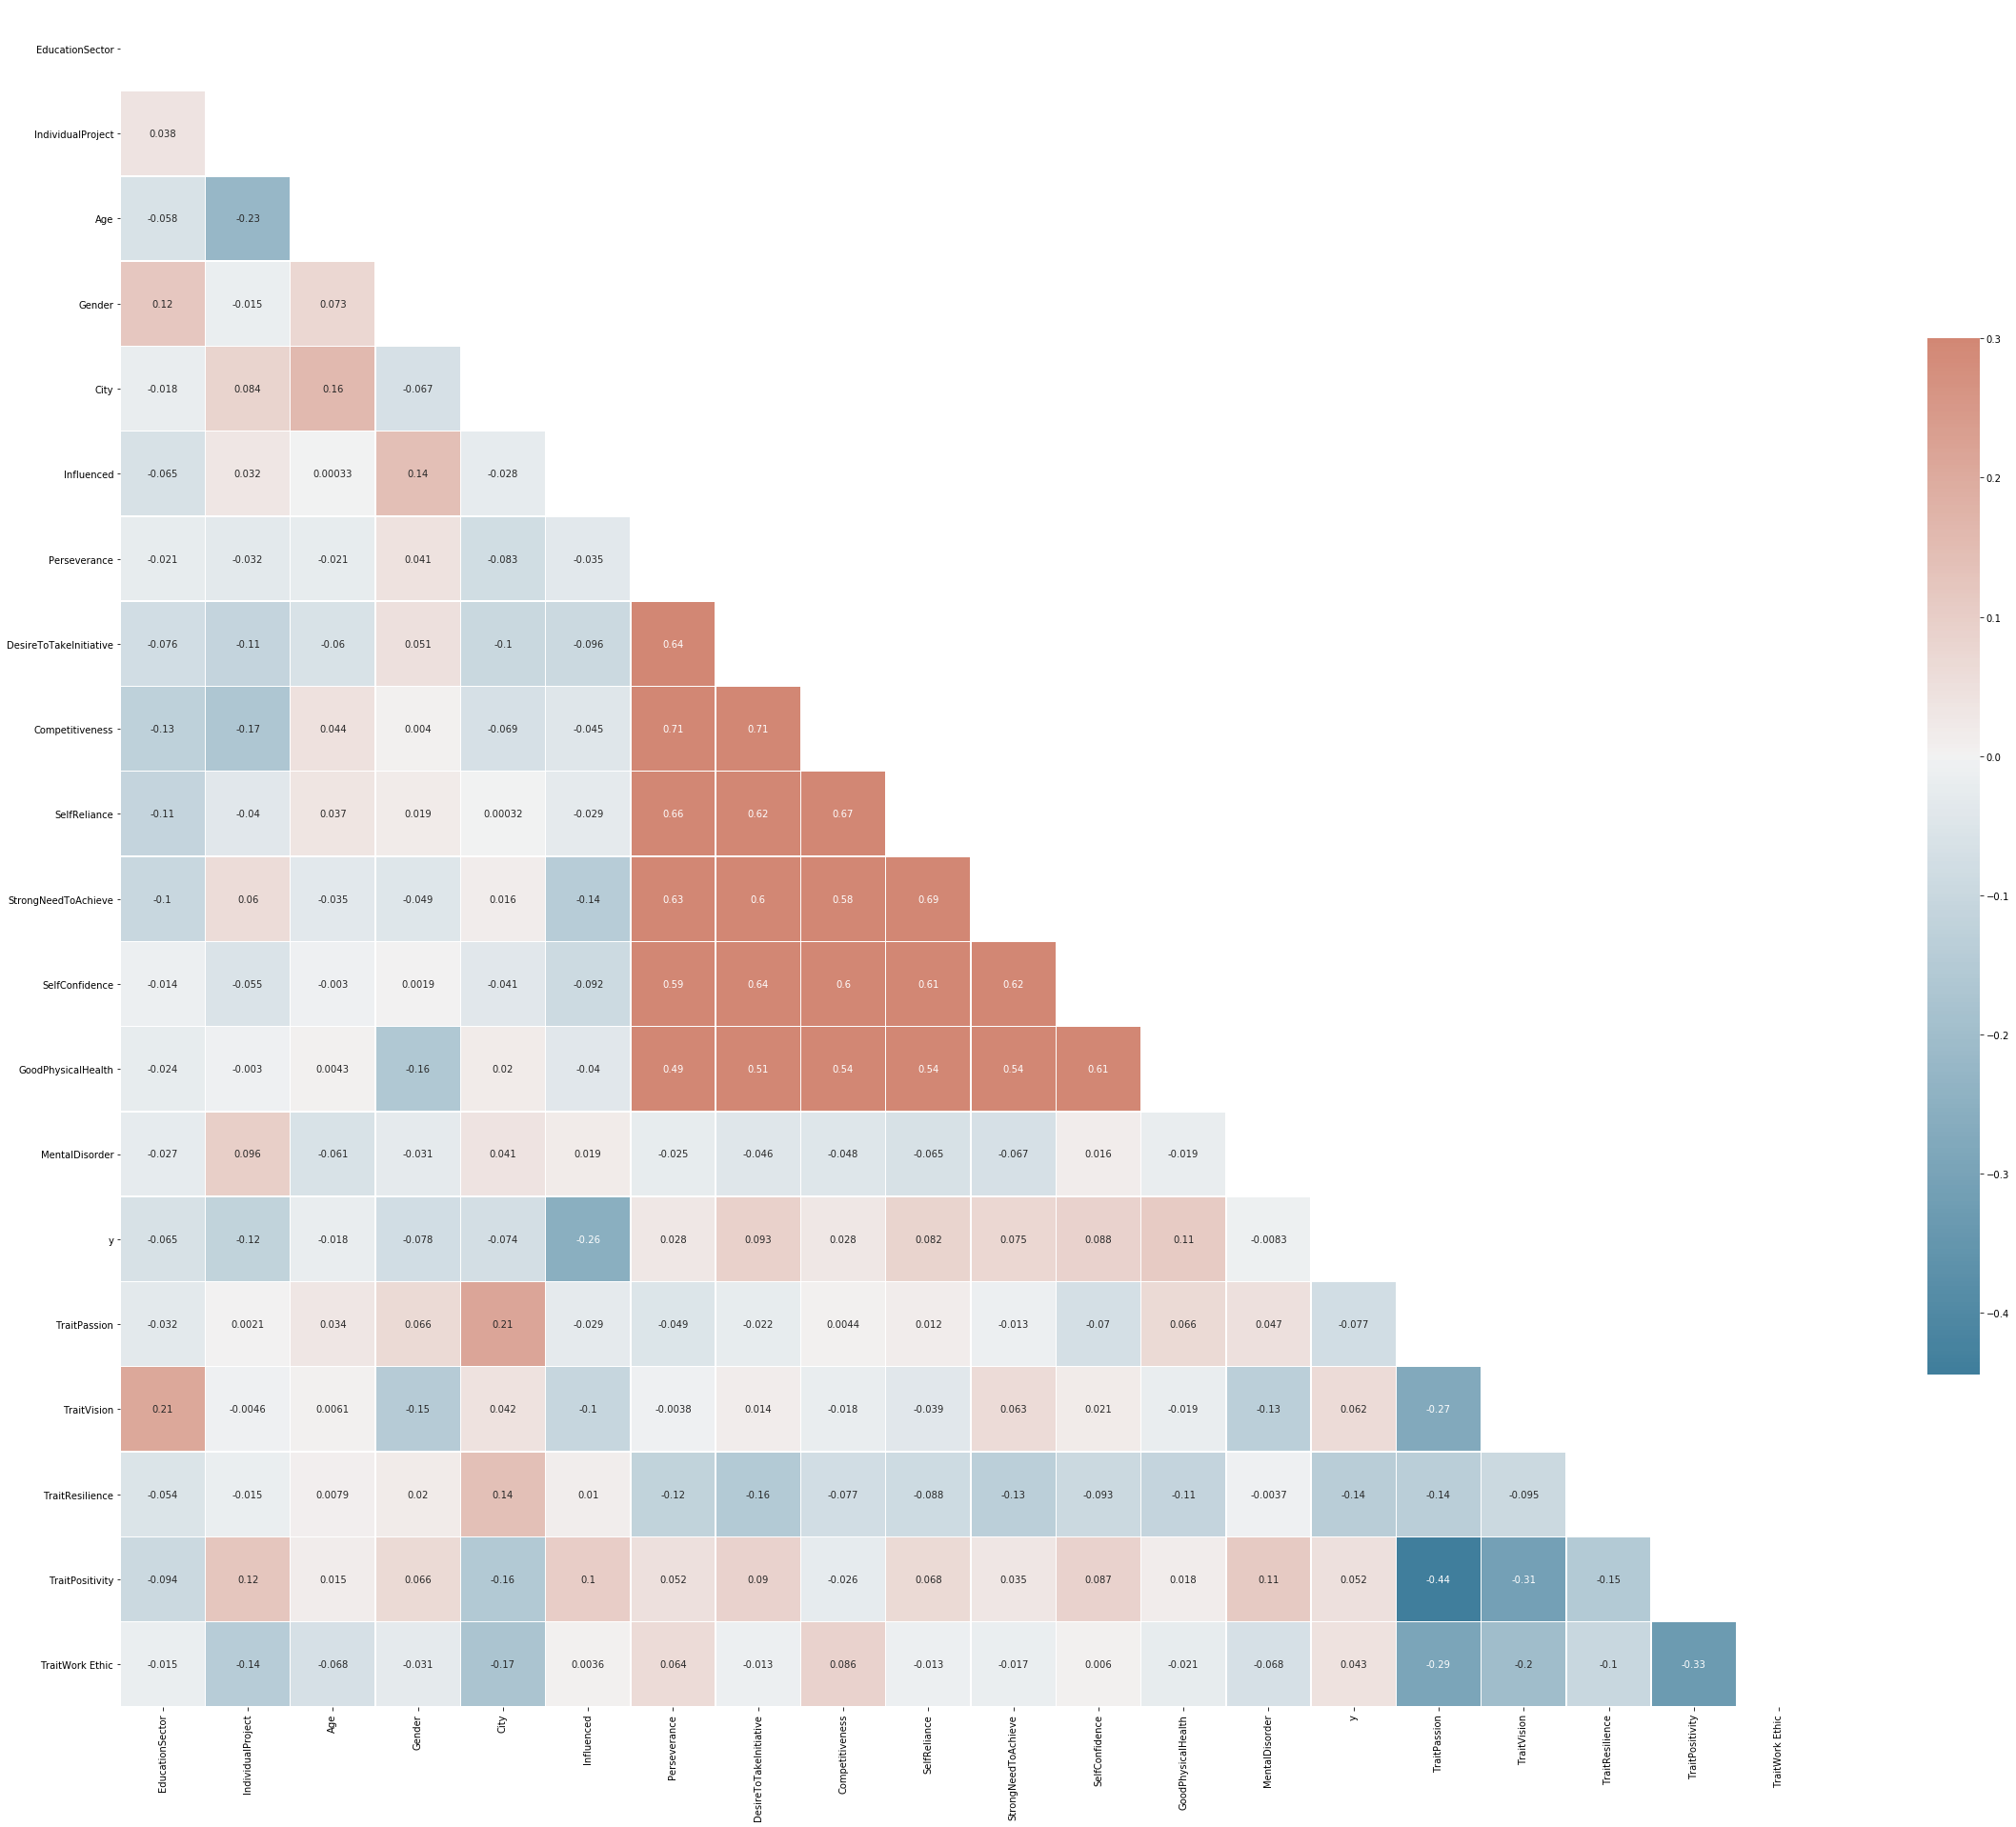

In [4]:
ind_map = {'Yes':0, 'No':1}
df['IndividualProject'] = df['IndividualProject'].map(ind_map)

gen_map = {'Male':0, 'Female':1}
df['Gender'] = df['Gender'].map(gen_map)

cit_map = {'Yes':0, 'No':1}
df['City'] = df['City'].map(cit_map)

inf_map = {'Yes':0, 'No':1}
df['Influenced'] = df['Influenced'].map(inf_map)

men_map = {'Yes':0, 'No':1}
df['MentalDisorder'] = df['MentalDisorder'].map(men_map)

for t in df['KeyTraits'].unique():
    df[f'Trait{t}'] = df['KeyTraits'] == t

education_map = {'Engineering Sciences':1, 'Others':2, 'Economic Sciences, Business Studies, Commerce and Law':3,
                 'Art, Music or Design':4, 'Humanities and Social Sciences':5, 'Medicine, Health Sciences':6, 
                 'Teaching Degree (e.g., B.Ed)':7, 'Mathematics or Natural Sciences':8, 'Language and Cultural Studies':9}
df['EducationSector'] = df['EducationSector'].map(education_map)

df.drop(columns=['ReasonsForLack'], inplace=True)

def display_correlation_matrix(data):
    """ Displays a correlation matrix for a dataset """
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(40, 40))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
    

display_correlation_matrix(df)

Thanks to the correlation map we can select features that contribute the most to the outcome:
* Age
* Individual Project
* Gender
* City
* Influenced
* SelfConfidence
* Strong Need To Achieve
* Good Physical Health

### Interesting variables inspection

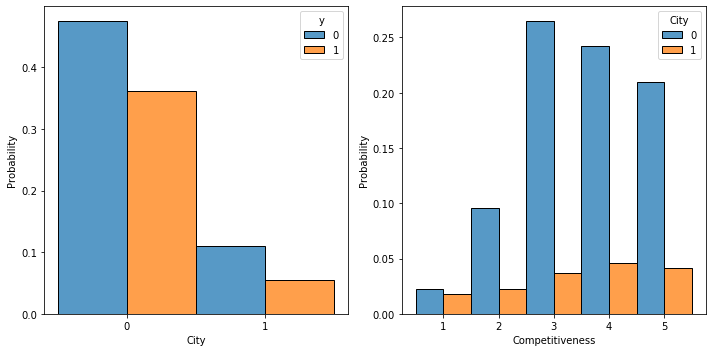

In [5]:
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(x=df['City'], hue='y', data=df, discrete=True, stat='probability', multiple="dodge", ax=a1)
sns.histplot(x=df['Competitiveness'], hue='City', data=df, discrete=True, stat='probability', multiple="dodge", ax=a2)
a1.set_xticks([0, 1])
fig.tight_layout()

Students from a city are more likely to become entrepreneurs, as there's higher population in cities which leads to students growing up in cities being more competitive and the second plot confirms it.

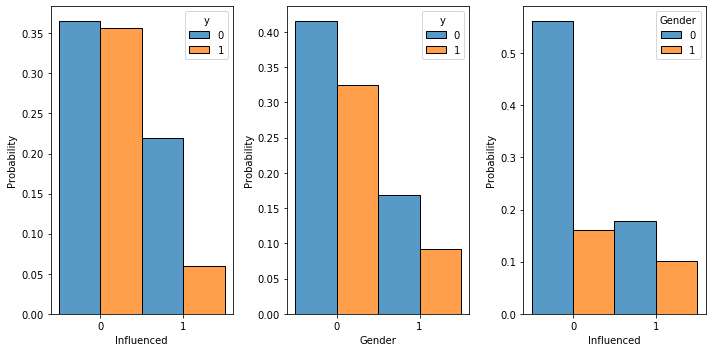

In [6]:
fig, (a1, a2, a3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

sns.histplot(x=df['Influenced'], hue='y', data=df, discrete=True, stat='probability', multiple="dodge", ax=a1)
sns.histplot(x=df['Gender'], hue='y', data=df, discrete=True, stat='probability', multiple="dodge", ax=a2)
sns.histplot(x=df['Influenced'], hue='Gender', data=df, discrete=True, stat='probability', multiple="dodge", ax=a3)
a1.set_xticks([0,1])
a2.set_xticks([0,1])
a3.set_xticks([0,1])
fig.tight_layout()

Being influenced by someone plays a significant role in being a successful entrepreneur.

It appears that men (0) are more likely to become entrepreneurs which is representative of most first world countries. It's likely that women aren't provided with as much family support, or perhaps don't have the same opportunities or have less interest in pursuing a career in this field. 

Also men are more influenced, as they are probably inspired by other successful male entrepreneurs while the same might not apply to women that have much fewer representatives in this field.


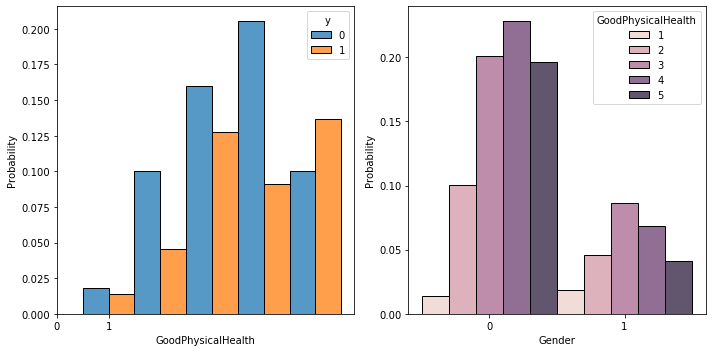

In [7]:
fig, (a1, a2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(x=df['GoodPhysicalHealth'], hue='y', data=df, discrete=True, stat='probability', multiple="dodge", ax=a1)
sns.histplot(x=df['Gender'], hue='GoodPhysicalHealth', data=df, discrete=True, stat='probability', multiple="dodge", ax=a2)
a1.set_xticks([0,1])
a2.set_xticks([0,1])
fig.tight_layout()

Students with GoodPhysicalHealth greater than 3 are more likely to be entreprenurially competent as a better physical health probably allows one to handle stress a lot better than those with poor physical health.

Moreover, by inspecting the probability of GoodPhysicalHealth of the two genders we can see that men tend to have a better physical health with respect to women.

In [8]:
df.drop(columns=[f'Trait{t}' for t in df['KeyTraits'].unique()], inplace=True)
df.drop(columns=['KeyTraits', 'EducationSector'], inplace=True)

In [9]:
np.random.seed(50)
sample = np.random.choice(df.index, size=int(len(df) * 0.8), replace=False)

train_data = df.iloc[sample]
test_data = df.drop(sample)
test_y = test_data['y']
test_data.drop(columns=['y'], inplace=True)

### My custom model

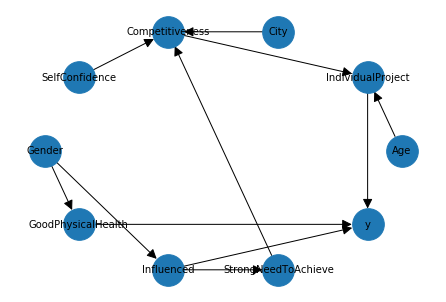

In [10]:
from pgmpy.models import BayesianModel

import networkx as nx

# Defining the network structure
custom_student_model = BayesianModel([('Age','IndividualProject'),
                                      ('City','Competitiveness'),
                                      ('SelfConfidence','Competitiveness'),
                                      ('Competitiveness', 'IndividualProject'),
                                      ('Gender','GoodPhysicalHealth'),
                                      ('Gender','Influenced'),
                                      ('Influenced', 'StrongNeedToAchieve'),
                                      ('StrongNeedToAchieve','Competitiveness'),
                                      ('Influenced', 'y'), 
                                      ('GoodPhysicalHealth', 'y'), 
                                      ('IndividualProject', 'y')])

nx.draw_circular(custom_student_model, with_labels=True, arrowsize=20, node_size=1000, font_size=10)
plt.show()

I'm also interested in having a simpler model and see how well it performs.

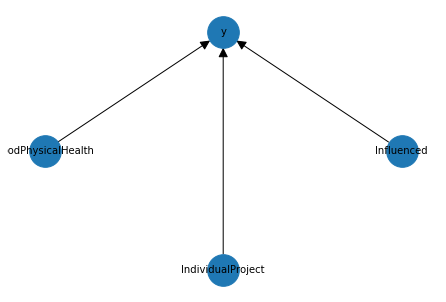

In [11]:
custom_simple_model = BayesianModel([('Influenced', 'y'),
                                     ('GoodPhysicalHealth', 'y'),
                                     ('IndividualProject', 'y')])

nx.draw_circular(custom_simple_model, with_labels=True, arrowsize=20, node_size=1000, font_size=10)
plt.show()

## Structure Learning

### Score-based Structure Learning

In order to guide the searching algorithm I tested some parameters in HillClimbSearch like *fixed_edges* and *black_list*.

* *fixed_edges*: from the above analysis of the correlation matrix we can see that there are 3 columns that influence the most the target: *GoodPhysicalHealth*, *Influenced* and *IndividualProject*. When I didn't impose edges from these 3 variables to the target, it appened that the algorithm assigned edges from the taget to the variables and this is not correct as we don't want outcoming edges from the taget.
      

* *black_list*: in this dataset we have 3 variables that we can assume to be independent: *Age*, *Gender* and *City*. In order to avoid incoming edges from other variables to these independent ones, I listed all possible incoming edges and excluded them from the search by passing the list to the *black_list* parameter.

In [12]:
fixed = [('GoodPhysicalHealth', 'y'), ('Influenced', 'y'), ('IndividualProject', 'y')]
no_edges = list(set().union(*[[(c, i) for c in train_data.columns if c != i] for i in ['Age', 'City', 'Gender']]))

  0%|          | 8/1000000 [00:01<64:42:57,  4.29it/s] 


Hill Climb Search with BDeu Score


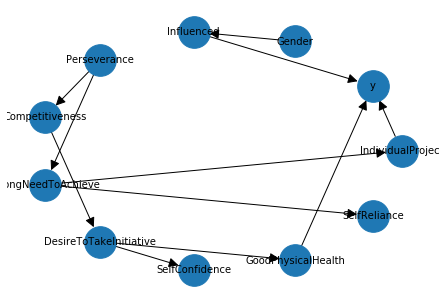

In [13]:
from pgmpy.estimators import HillClimbSearch, BDeuScore, K2Score

hc = HillClimbSearch(train_data)
hc_bds_model = BayesianModel(
    hc.estimate(
        scoring_method=BDeuScore(train_data), 
        fixed_edges=fixed,
        black_list=no_edges
    )
    .edges())
print('Hill Climb Search with BDeu Score')
nx.draw_circular(hc_bds_model, with_labels=True, arrowsize=20, node_size=1000, font_size=10)
plt.show()

  0%|          | 13/1000000 [00:02<55:04:19,  5.04it/s]


Hill Climb Search with K2 Score


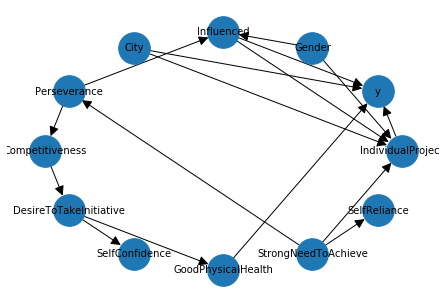

In [14]:
hc = HillClimbSearch(train_data)
hc_k2s_model = BayesianModel(
    hc.estimate(
        scoring_method=K2Score(train_data),
        fixed_edges=fixed,
        black_list=no_edges
    )
    .edges())
print('Hill Climb Search with K2 Score')
nx.draw_circular(hc_k2s_model, with_labels=True, arrowsize=20, node_size=1000, font_size=10)
plt.show()

### Parameter Estimation

In [15]:
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

def estimate_parameters(models, data):
    ''' 
    Given a list of models and the data
    uses MLE and Bayesian estimator to
    return a dictionary model -> pairs of cdps
    '''
    fitted = {}
    for name, model in models.items():
        mle = model.copy()
        mle.fit(data, estimator=MaximumLikelihoodEstimator)
        bay = model.copy()
        bay.fit(data, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=5)
        fitted[name] = (mle, bay)
    return fitted

In [16]:

models = {'Custom': custom_student_model, 
          'SimpleCustom': custom_simple_model, 
          'HillClimbSearch-BDeuScore': hc_bds_model, 
          'HillClimbSearch-K2Score': hc_k2s_model}

fitted_models = estimate_parameters(models, train_data)



### Inference with Variable Elimination

In [17]:
from pgmpy.inference import VariableElimination

for name, (mle, bay) in fitted_models.items():
    inf = VariableElimination(mle)
    y_prob = inf.query(['y'])
    print(f'Maximum Likelihood estimator with model {name}')
    print(y_prob)
    inf = VariableElimination(bay)
    y_prob = inf.query(['y'])
    print(f'Bayesian estimator with model {name}')
    print(y_prob)
    
    

Eliminating: GoodPhysicalHealth: 100%|██████████| 3/3 [00:00<00:00, 334.47it/s]


Maximum Likelihood estimator with model Custom
+------+----------+
| y    |   phi(y) |
+======+==========+
| y(0) |   0.5716 |
+------+----------+
| y(1) |   0.4284 |
+------+----------+
Bayesian estimator with model Custom
+------+----------+
| y    |   phi(y) |
+======+==========+
| y(0) |   0.5700 |
+------+----------+
| y(1) |   0.4300 |
+------+----------+
Maximum Likelihood estimator with model SimpleCustom
+------+----------+
| y    |   phi(y) |
+======+==========+
| y(0) |   0.5721 |
+------+----------+
| y(1) |   0.4279 |
+------+----------+
Bayesian estimator with model SimpleCustom
+------+----------+
| y    |   phi(y) |
+======+==========+
| y(0) |   0.5706 |
+------+----------+
| y(1) |   0.4294 |
+------+----------+


Eliminating: Influenced: 100%|██████████| 9/9 [00:00<00:00, 130.76it/s]   

Maximum Likelihood estimator with model HillClimbSearch-BDeuScore
+------+----------+
| y    |   phi(y) |
+======+==========+
| y(0) |   0.5719 |
+------+----------+
| y(1) |   0.4281 |
+------+----------+
Bayesian estimator with model HillClimbSearch-BDeuScore
+------+----------+
| y    |   phi(y) |
+======+==========+
| y(0) |   0.5705 |
+------+----------+
| y(1) |   0.4295 |
+------+----------+
Maximum Likelihood estimator with model HillClimbSearch-K2Score


Eliminating: Influenced: 100%|██████████| 9/9 [00:00<00:00, 123.62it/s]   


+------+----------+
| y    |   phi(y) |
+======+==========+
| y(0) |   0.5604 |
+------+----------+
| y(1) |   0.4396 |
+------+----------+
Bayesian estimator with model HillClimbSearch-K2Score
+------+----------+
| y    |   phi(y) |
+======+==========+
| y(0) |   0.5598 |
+------+----------+
| y(1) |   0.4402 |
+------+----------+


## Prediction

In [20]:
import numpy as np

def accuracy_score(y_true, y_pred):
    correct = (np.array(y_pred) == np.array(y_true)).sum()
    acc = correct/len(y_pred)
    return acc, correct

for name, (mle, bay) in fitted_models.items():
    columns = list(mle.nodes)
    columns.remove('y')
    
    y_pred = mle.predict(test_data[columns])['y']
    print(f'Maximum Likelihood estimator with model {name}')
    acc, corr = accuracy_score(test_y, y_pred)
    print(f'Accuracy: {acc:.2f} ({corr}/{len(test_data)})')
    
    y_pred = bay.predict(test_data[columns])['y']
    print(f'Bayesian estimator with model {name}')
    acc, corr = accuracy_score(test_y, y_pred)
    print(f'Accuracy: {acc:.2f} ({corr}/{len(test_data)})')


 19%|█▊        | 8/43 [00:00<00:00, 55.47it/s]

Maximum Likelihood estimator with model Custom
Accuracy: 0.64 (28/44)


  0%|          | 0/16 [00:00<?, ?it/s]

Bayesian estimator with model Custom
Accuracy: 0.64 (28/44)
Maximum Likelihood estimator with model SimpleCustom
Accuracy: 0.64 (28/44)


  0%|          | 0/43 [00:00<?, ?it/s]

Bayesian estimator with model SimpleCustom
Accuracy: 0.64 (28/44)


 37%|███▋      | 16/43 [00:00<00:00, 120.62it/s]

Maximum Likelihood estimator with model HillClimbSearch-BDeuScore
Accuracy: 0.64 (28/44)


 18%|█▊        | 8/44 [00:00<00:00, 67.60it/s]

Bayesian estimator with model HillClimbSearch-BDeuScore
Accuracy: 0.64 (28/44)


 18%|█▊        | 8/44 [00:00<00:00, 69.40it/s]

Maximum Likelihood estimator with model HillClimbSearch-K2Score
Accuracy: 0.66 (29/44)


100%|██████████| 44/44 [00:00<00:00, 48.90it/s]


Bayesian estimator with model HillClimbSearch-K2Score
Accuracy: 0.66 (29/44)
